# Cálculo para transpor para o artigo
Beseado no arquivo draft2.ipynb

In [272]:
from sympy import *
from sympy.abc import s, t
from sympy.stats import E

In [2]:
init_session()

IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [377]:
j = Symbol('\\left\\langle{j}\\right\\rangle')
z = Symbol('z',complex=True)
x,y = symbols('x y', real=True)
b = Symbol('beta',positive=True)
a = Symbol('a',positive=True)
Pin, Pi = symbols('P_\\infty \\Pi',cls=Function)
mu = IndexedBase('\\mu')

In [431]:
def f(z,k):
    return sinh(a*z)/(a*z)

def PI(z,m,n):
    a = Symbol('beta',positive=True)
    aux = exp(-m*z)*Product((f(z,k))**(2**k), (k, 1, n)).doit()
    #aux = aux.rewrite(exp).expand()
    return aux

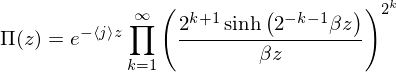

In [96]:
Eq(Pi(z),PI(z,j,oo))

Aplicando o $\ln$ para a transformada de Laplace

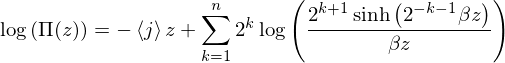

In [94]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*log(f(z,k)),(k,1,n)))

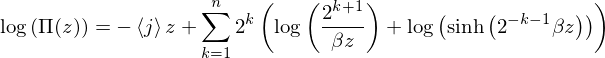

In [97]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*(log(2**(k+1)/(b*z))+
                          log(sinh(b*z/(2**(k+1))))),(k,1,n)))

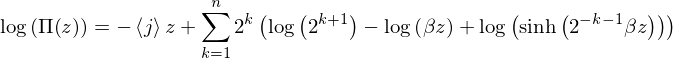

In [99]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*(log(2**(k+1))-log(b*z)+
                          log(sinh(b*z/(2**(k+1))))),(k,1,n)))

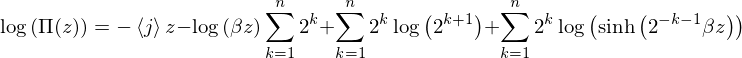

In [100]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*log(2**(k+1)),(k,1,n))-
   log(b*z)*Sum(2**k,(k,1,n))+
   Sum((2**k)*log(sinh(b*z/(2**(k+1)))),(k,1,n))) 

## Calculando a primeira derivada

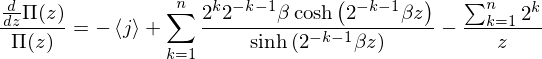

In [101]:
Eq(1/Pi(z)*diff(Pi(z),z),diff(-j*z+Sum((2**k)*log(2**(k+1)),(k,1,n))-
                              log(b*z)*Sum(2**k,(k,1,n))+
                              Sum((2**k)*log(sinh(b*z/(2**(k+1)))),(k,1,n)),z))

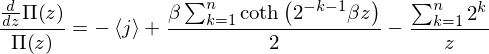

In [160]:
Eq(1/Pi(z)*diff(Pi(z),z),-j+b/2*Sum(coth(b*z/(2**(k+1))),(k,1,n))-
  Sum(2**k,(k,1,n))/z)

### Expandindo em série a parte real e imaginária

In [178]:
t1 = b/2*coth(b*z/(2**(k+1)))
t2 = -2**k/z

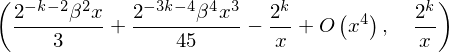

In [179]:
im(t1).subs([[im(z),x],[re(z),0]]).series(x,0,4),im(t2).subs([[im(z),x],[re(z),0]])

Claramente vemos que a parte imaginária é nula quando $x=\Im(z)$ tende a zero, já a parte real pode ser expandida

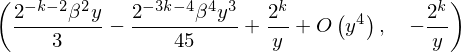

In [186]:
re(t1).subs([[re(z),y],[im(z),0]]).series(y,0,4),re(t2).subs([[re(z),y],[im(z),0]])

Vemos aqui também que quando $y=\Re(z)$ tende a zero, os termos também são nulos

## Segunda derivada

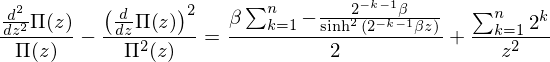

In [212]:
Eq(-1/Pi(z)**2*diff(Pi(z),z)**2+1/Pi(z)*diff(Pi(z),z,2),
  diff(-j+b/2*Sum(coth(b*z/(2**(k+1))),(k,1,n))-
  Sum(2**k,(k,1,n))/z,z))

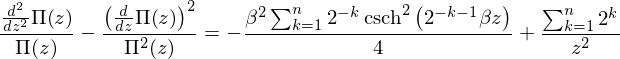

In [211]:
Eq(-1/Pi(z)**2*diff(Pi(z),z)**2+1/Pi(z)*diff(Pi(z),z,2),
  -b**2/2**2*Sum(csch(b*z/2**(k+1))**2/(2**k),(k,1,n))
  +Sum(2**k,(k,1,n))/z**2)

In [209]:
t1 = -b**2/4*csch(b*z/2**(k+1))**2/(2**k)
t2 = 2**k/z**2

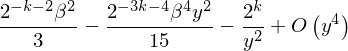

In [210]:
re(t1).subs([[im(z),0],[re(z),y]]).series(y,0,4)

Aqui é que observamos o fator $1/12$ que achamos nos primeiros cálculos

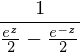

In [106]:
(1/sinh(z)).rewrite(exp)

In [208]:
re(t2).subs([[im(z),0],[re(z),y]])

## Terceira derivada

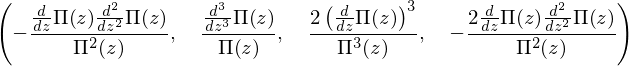

In [227]:
(-1/Pi(z)**2*diff(Pi(z),z,2)*diff(Pi(z),z),
 +1/Pi(z)*diff(Pi(z),z,3),
 +2/Pi(z)**3*diff(Pi(z),z)**3,
 -2/Pi(z)**2*diff(Pi(z),z)*diff(Pi(z),z,2))

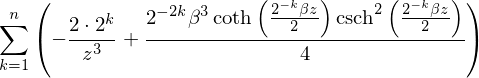

In [235]:
diff(-b**2/2**2*Sum(csch(b*z/2**(k+1))**2/(2**k),(k,1,n))
  +Sum(2**k,(k,1,n))/z**2,z).simplify()

In [263]:
t1 = b**3/2**(2*k)*coth(b*z/2**(k+1))*csch(b*z/2**(k+1))**2/4
t2 = -2*2**k/z**3

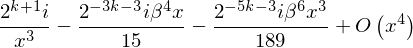

In [261]:
t1.subs([[z,y+I*x],[y,0]]).series(x,0,4)

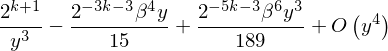

In [262]:
t1.subs([[z,y+I*x],[x,0]]).series(y,0,4)

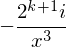

In [266]:
t2.subs([[z,y+I*x],[y,0]]).series(x,0,4)

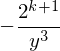

In [267]:
t2.subs([[z,y+I*x],[x,0]]).series(y,0,4)

In [321]:
diff(log(Pi(z)),z,3).subs([[diff(Pi(z),z,3),mu[3]],[diff(Pi(z),z,2),mu[2]],[diff(Pi(z),z),mu[1]],[Pi(z),1]])

In [322]:
f = -j*z+Sum((2**k)*log(f(z,k)),(k,1,n))

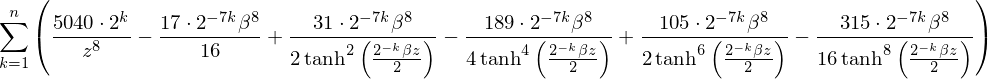

In [415]:
f1 = f.expand(log).diff(z,8).simplify()
f1

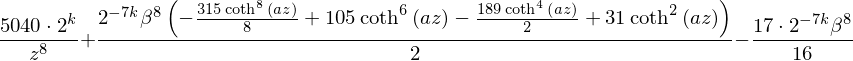

In [420]:
cotgh = coth(a*z)

g = 5040*2**k/z**8 -17*2**(-7*k)*b**8/16 +2**(-7*k)*b**8/2*(31*cotgh**2-189*cotgh**4/2+105*cotgh**6-315*cotgh**8/8)
g

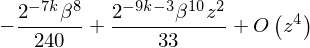

In [421]:
g.subs([[a,b/2**(k+1)]]).series(z,0,4)

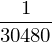

In [422]:
Sum(2**(-7*k)/240,(k,1,oo)).doit()

# Escrevendo sem somatório para explicitar os momentos

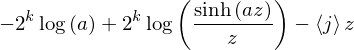

In [512]:
f0 = (-j*z+(2**k)*log(f(z,k))).expand(log)
f0

In [522]:
f1 = f0.diff(z,1).subs([[a,b/2**(k+1)]])
f1 = f1.trigsimp()
c1 = f1.limit(z,0)
c1

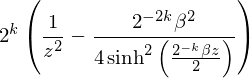

In [523]:
f2 = f0.diff(z,2).subs([[a,b/2**(k+1)]])
f2 = f2.trigsimp()
f2

In [524]:
c2 = f2.limit(z,0)
c2 = Sum(c2,(k,1,oo)).doit()
c2

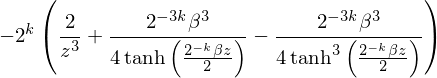

In [525]:
f3 = f0.diff(z,3).subs([[a,b/2**(k+1)]])
f3 = f3.trigsimp()
f3

In [526]:
c3 = f3.limit(z,0)
c3

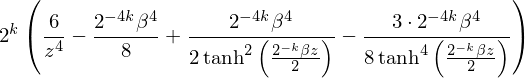

In [527]:
f4 = f0.diff(z,4).subs([[a,b/2**(k+1)]])
f4 = f4.trigsimp()
f4

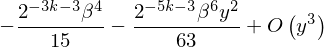

In [548]:
c4 = f4.subs([[z,I*y]]).series(y,0,3)
c4

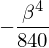

In [549]:
c4 = Sum(-2**(-3*k-3)*b**4/15,(k,1,oo)).doit()
c4

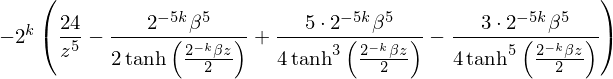

In [530]:
f5 = f0.diff(z,5).subs([[a,b/2**(k+1)]])
f5 = f5.trigsimp()
f5

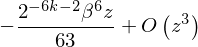

In [539]:
g5 = 24/z**5+2**(-5*k)*b**5/2*(-coth(a*z)+5*coth(a*z)**3/2-3*coth(a*z)**5/2)
g5.subs([[a,b/2**(k+1)]]).series(z,0,3)

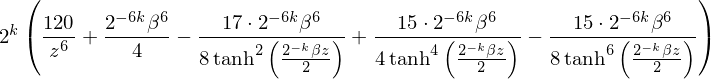

In [540]:
f6 = f0.diff(z,6).subs([[a,b/2**(k+1)]])
f6 = f6.trigsimp()
f6

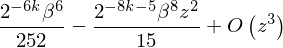

In [546]:
g6 = 120/z**6 +2**(-6*k)*b**6/4 +2**(-6*k)*b**6/4*(-17*coth(a*z)**2/2+15*coth(a*z)**4-15*coth(a*z)**6/2)
g6.subs([[a,b/2**(k+1)]]).series(z,0,3)

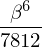

In [581]:
c6 = Sum(2**k*2**(-6*k)/252*b**6,(k,1,oo)).doit()
c6

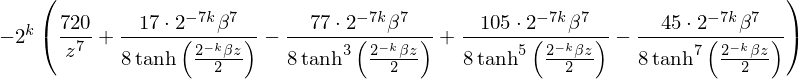

In [552]:
f7 = f0.diff(z,7).subs([[a,b/2**(k+1)]])
f7 = f7.trigsimp()
f7

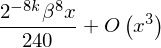

In [566]:
f7.args[2].subs([[z,x],[1/tanh(2**(-k)*b*x/2),coth(2**(-k)*b*x/2)]]).series(x,0,3)

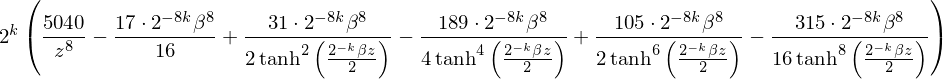

In [567]:
f8 = f0.diff(z,8).subs([[a,b/2**(k+1)]])
f8 = f8.trigsimp()
f8

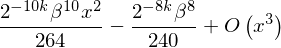

In [571]:
f8.args[1].subs([[z,x],[1/tanh(2**(-k)*b*x/2),coth(2**(-k)*b*x/2)]]).series(x,0,3)

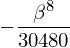

In [582]:
c8 = Sum(-2**k*2**(-8*k)*b**8/240,(k,1,oo)).doit()
c8

A série dos momentos até agora é:

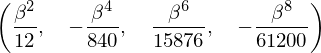

In [576]:
c2,c4,c6,c8

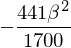

In [577]:
c8/c6

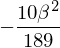

In [578]:
c6/c4

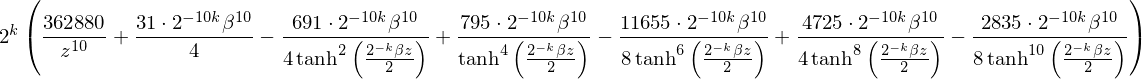

In [579]:
f10 = f0.diff(z,10).subs([[a,b/2**(k+1)]])
f10 = f10.trigsimp()
f10

In [585]:
f10 = f10.args[1].subs([[z,x],[1/tanh(2**(-k)*b*x/2),coth(2**(-k)*b*x/2)]])

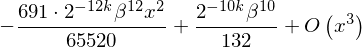

In [586]:
f10.series(x,0,3)

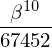

In [587]:
c10 = Sum(2**k*2**(-10*k)*b**10/132,(k,1,oo)).doit()
c10

In [590]:
mathematica_code([c2,c4,c6,c8,c10])

'{(1/12)*beta^2, -1/840*beta^4, (1/7812)*beta^6, -1/30480*beta^8, (1/67452)*beta^10}'

Momentos pares até o décimo

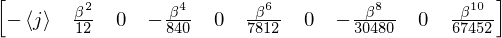

In [752]:
Secnds = Array([-j,b**2*Rational(1,12), 0, b**4*Rational(-1,840), 0, b**6*Rational(1,7812), 0, b**8*Rational(-1,30480), 0, b**10*Rational(1,67452)])
Secnds

# Construindo o lado dreito da equação

In [685]:
logP = log(Pi(z))

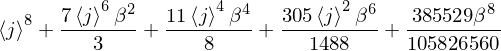

In [815]:
mth = 8
m8 = solve(Eq(logP.diff(z,mth).subs([[diff(Pi(z),z,i),(-1)**i*mu[i]] for i in range(mth,0,-1)]+[[Pi(z),1],[mu[1],j]]),Secnds[mth-1]),mu[mth])[0]
m8 = m8.subs([[mu[2],m2],[mu[3],m3],[mu[4],m4],[mu[5],m5],[mu[6],m6],[mu[7],m7]]).simplify().expand()
m8

In [825]:
m1 = j
Eq(mu[1],m1)

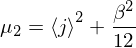

In [758]:
Eq(mu[2],m2)

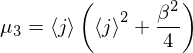

In [769]:
Eq(mu[3],m3)

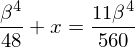

In [796]:
Eq(3*(m2-j**2)**2+x,11*b**4/560)

O que falta para o momento ser gaussiano, o valor é o resultado em $x$

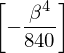

In [802]:
solve(Eq(3*(m2-j**2)**2+x,11*b**4/560),x)

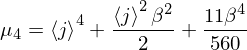

In [809]:
Eq(mu[4],m4)

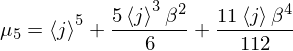

In [807]:
Eq(mu[5],m5)

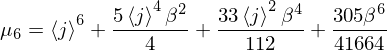

In [811]:
Eq(mu[6],m6)

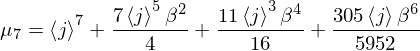

In [814]:
Eq(mu[7],m7)

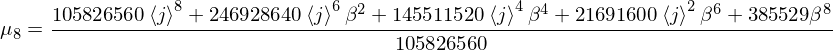

In [817]:
Eq(mu[8],m8.factor())

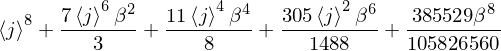

In [818]:
m8.simplify()

In [831]:
((x-j)**4).expand()

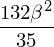

In [835]:
simplify(j**4-4*j**3*m1+6*j**2*m2-4*j*m3+m4)*(12/b*2)**2/3